<a href="https://www.kaggle.com/code/vencerlanz09/nespresso-image-classification-using-cnn?scriptVersionId=137126985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-family:Verdana;"> <center>☕ Nespresso Capsules Image Classification Using Convolutional Neural Networks</center> </h1>
<p><center style="color:#159364; font-family:Helvetica; font-size:20px;">A Comprehensive Notebook Outlining a Tranfer Learning approach for Nespresso Image Classification/</center></p>


***

<center><img src='https://img.freepik.com/free-vector/hand-drawn-flat-design-people-with-hot-drinks_23-2149081369.jpg?w=826&t=st=1689657734~exp=1689658334~hmac=7704211d5cd3ceed05e8691d81af818cd1964ff74696d5075836ab0740679134' height=150px width=400px></center>

# 👋Thanks for Visiting my Notebook
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana; border-radius: 15px; background-color: #cce5ff; border-color: #b8daff;">
    📌 Feel free to fork or edit the notebook for your own convenience. If you liked the notebook, consider upvoting. It helps other people discover the notebook as well. Your support inspires me to produce more of these kernels.😊
</div>

# 🔬Overview 
<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Nespresso, a brand that has significantly shaped the global coffee culture, was founded in 1986 as a part of the Nestlé Group. It started with only five employees and launched the world's first portioned coffee system to the office coffee sectors. The brand first tested its new concept in Japan in 1986 and rolled it out to consumers in Switzerland, France, Italy, and Japan the same year. A decade later, it had become a global brand.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The first Nespresso e-commerce site opened in 1998, and the first boutique opened in 2000. The following year, with China's admission to the World Trade Organization, Nespresso expanded its market reach. Nespresso has redefined and revolutionized the way millions of people enjoy their espresso coffee, and it continues to be a major player in the global coffee industry.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Sources: 
<a href="https://nestle-nespresso.com/our-history">Nestlé Nespresso - Our History</a>, 
<a href="https://en.wikipedia.org/wiki/Nespresso">Nespresso - Wikipedia</a>, 
<a href="https://www.theguardian.com/food/2020/jul/14/nespresso-coffee-capsule-pods-branding-clooney-nestle-recycling-environment">The Guardian - How Nespresso's coffee revolution got ground down</a>
</p>
</div>



# ❗Author's Note:
<div style="background-color:#d4f1f4; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Make sure to run the cells from top to bottom with a GPU accelerator. There are some linux commands present in some cells so this is important to take into account. Also, any suggestions, comments and recommendations to improve the notebook will be highly appreciated. Cheers!</p>
</div>

***

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>🏗️Import Necessary Libraries</b></h3>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The code imports various data science libraries, including TensorFlow and scikit-learn, and defines a neural network model using the EfficientNet architecture. It also includes system libraries for handling file paths and metrics for evaluating model performance. Additionally, it sets up various callbacks and optimizers to optimize the training process.</p>
</div>


In [1]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path
import random

# Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns
from cycler import cycler
import textwrap

sns.set_style('darkgrid')

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>📥Load and Transform Data</b></h3>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The Nespresso Capsules Dataset is a collection of images of different Nespresso coffee capsules. The dataset is organized into directories, where each directory represents a specific type of coffee capsule. The types of coffee capsules include Shanghai Lungo, Paris Espresso, Napoli, Nicaragua, Colombia, Coconut Flavour Over Ice, Ethiopia, India, Indonesia, Istanbul Espresso, and Nocciola.</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">Each directory contains images of the corresponding coffee capsule. The number of images varies for each type of coffee capsule, ranging from 60 to 75 images. The dataset is well-structured and balanced, making it suitable for image classification tasks.</p>
</div>


In [2]:
# Create helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot


BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
# Walk through each directory
dataset = "/kaggle/input/nespresso-capsules-dataset"
walk_through_dir(dataset);

--2023-07-18 09:13:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-18 09:13:48 (69.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]

There are 12 directories and 0 images in '/kaggle/input/nespresso-capsules-dataset'.
There are 0 directories and 66 images in '/kaggle/input/nespresso-capsules-dataset/SHANGHAI_LUNGO'.
There are 0 directories and 74 images in '/kaggle/input/nespresso-capsules-dataset/PARIS_ESPRESSO'.
There are 0 directories and 74 images in '/kaggle/input/nespresso-capsules-dataset/NAPOLI'.


<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>📅Placing Data into a Dataframe</b></h3>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The first column <b>filepaths</b> contains the file path location of each individual images. The second column <b>labels</b>, on the other hand, contains the class label of the corresponding image from the file path</p>
</div>


In [3]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

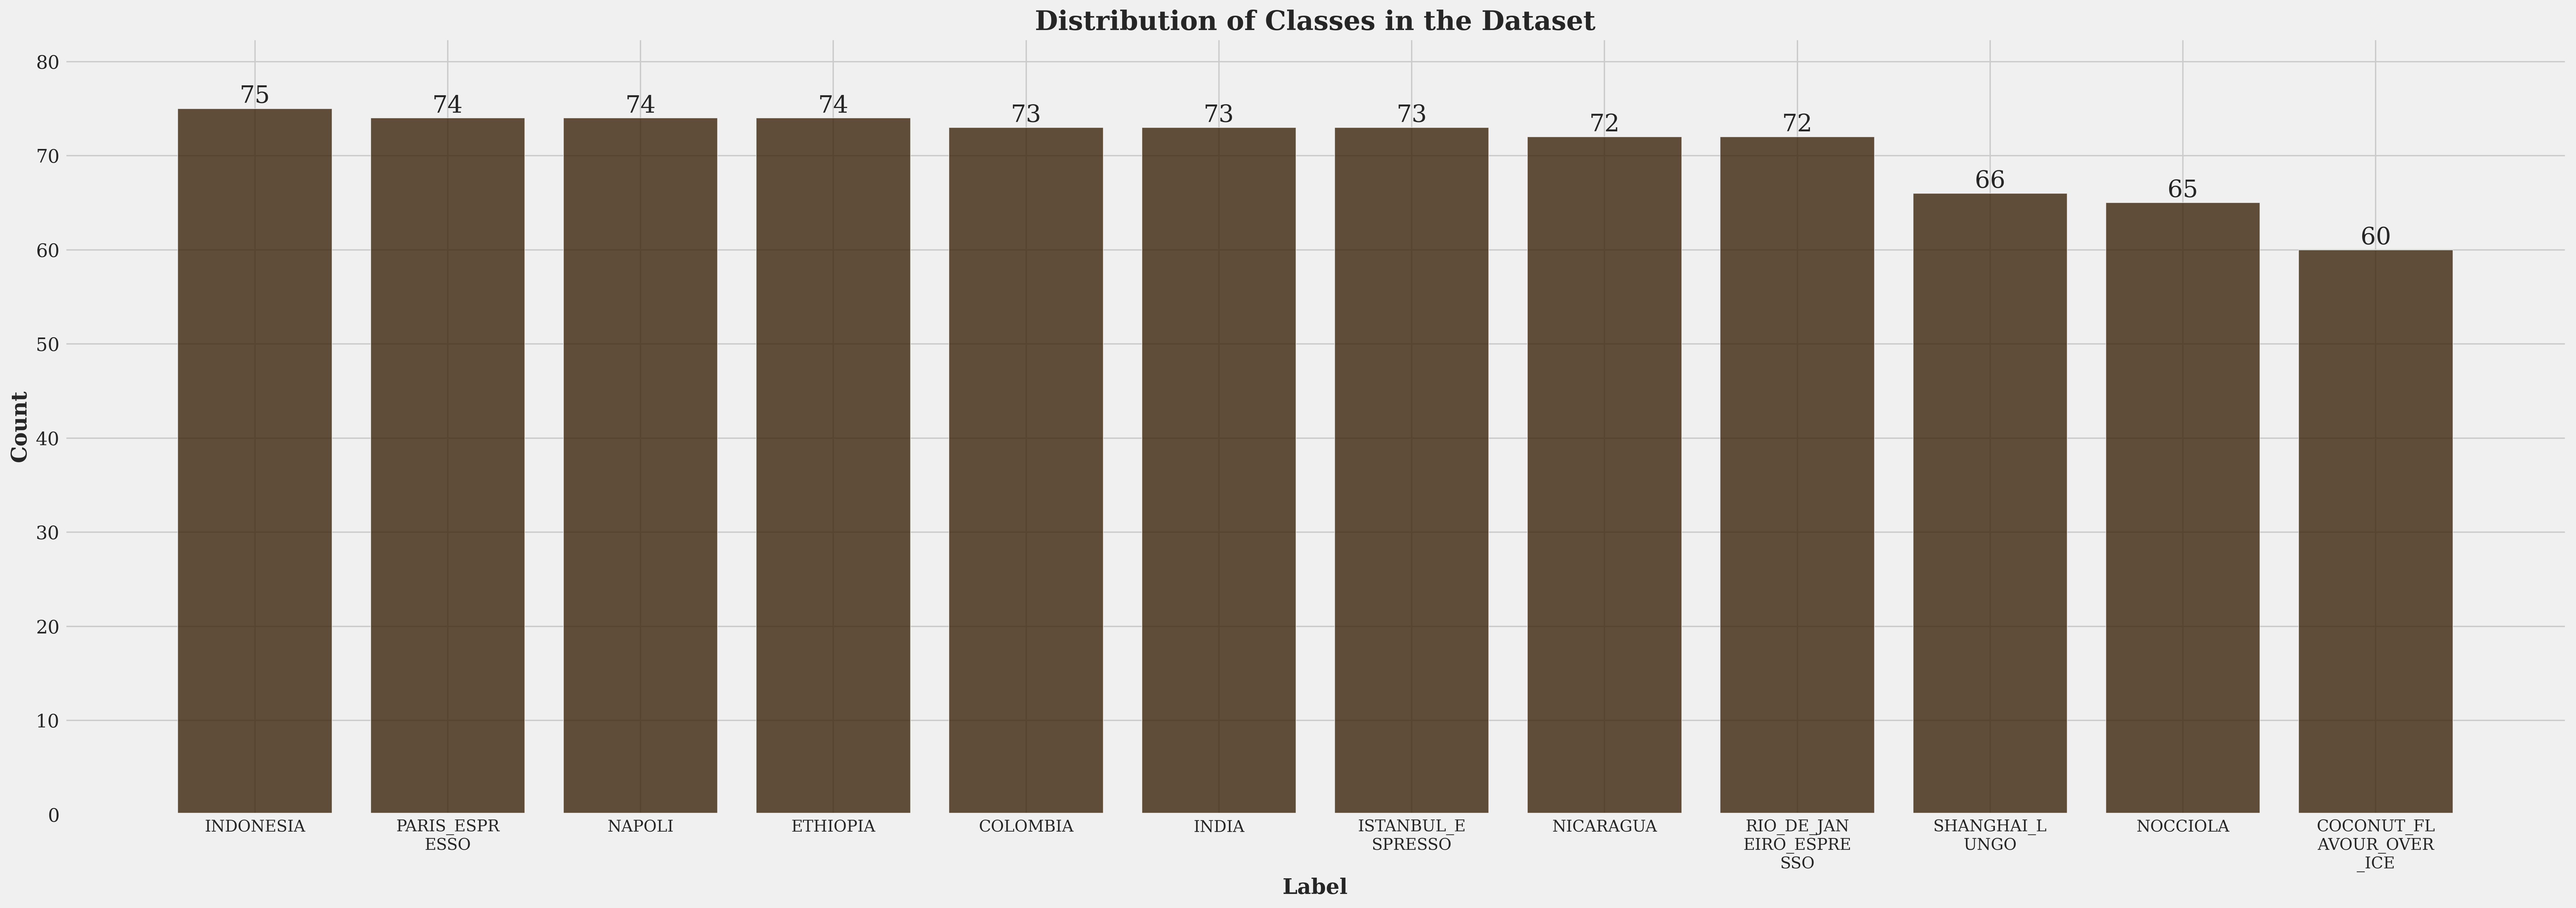

In [4]:
plt.style.use('fivethirtyeight')

# Get the labels
label_counts = image_df['Label'].value_counts()[:]

# Create a cycler object using the desired colors
color_cycler = (cycler(color=["#3B240B"]))  # Darker coffee brown color

# Set the property cycle of the axes to the created cycler object
plt.rc('axes', prop_cycle=color_cycler)

# Other styling options
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=200)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=10, markeredgewidth=2.5)

plt.figure(figsize=(30, 10), dpi=300)  # Increase figure size
bars = plt.bar(label_counts.index, label_counts.values, alpha=0.8)
plt.title('Distribution of Classes in the Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Label', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

# Wrap x-labels
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in label_counts.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=12, ha='center')  # Change alignment to 'center'

plt.yticks(fontsize=14)

# Adjust y limit to avoid overlapping
plt.ylim(0, max(label_counts) * 1.1)  # Set y limit 10% higher than the max value

# Add value annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.show()


# 🔭Visualizing images from the dataset

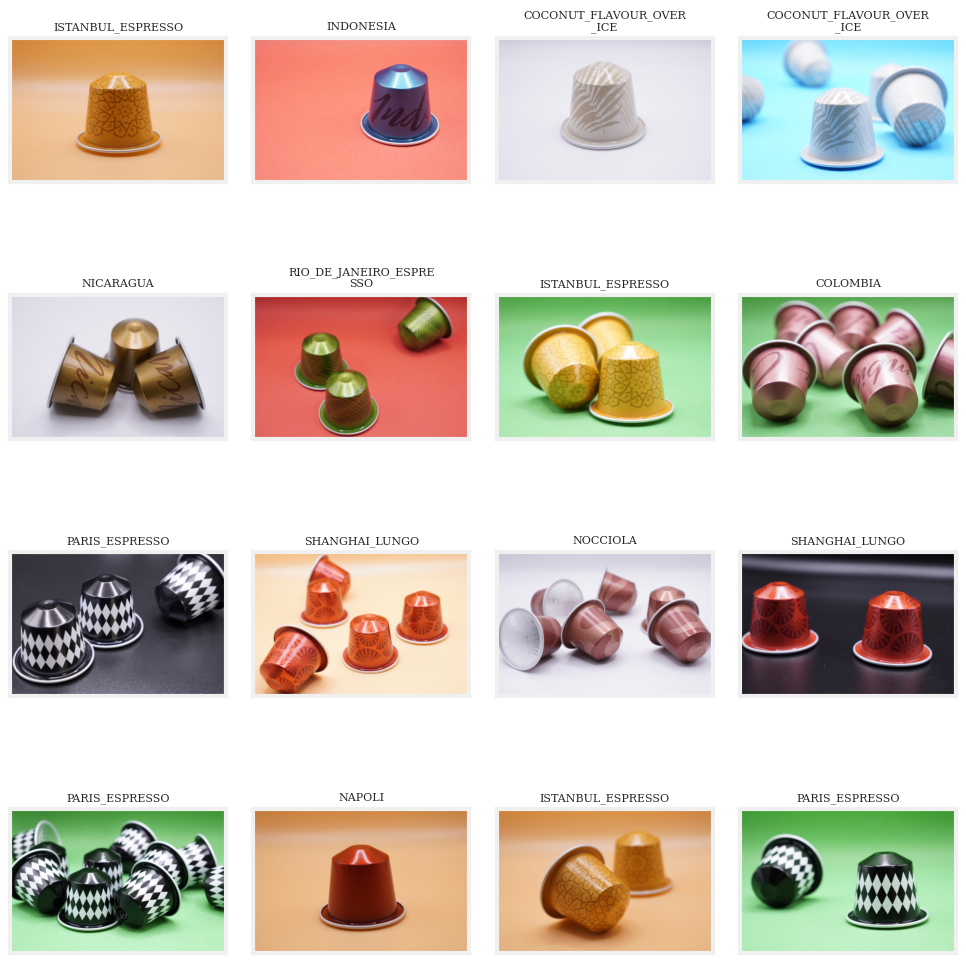

In [5]:
# Set title size and figure background color
plt.rcParams['axes.titlesize'] = 'small'  # Adjust as needed
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white

# Display 16 pictures of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    title = image_df.Label[random_index[i]]
    ax.set_title("\n".join(textwrap.wrap(title, 20)), fontsize=8)  # Wrap long titles
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
plt.show()


<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>🧮Computing Error Rate Analysis</b></h3>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The code below is used for error level analysis (ELA) of images in the context of a animals image classification task.</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The compute_ela_cv() function takes an image path and a quality parameter, compresses the image using JPEG compression at the given quality, and computes the absolute difference between the compressed and original images. The difference is multiplied by a scale factor and returned as an ELA image.</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The convert_to_ela_image() function takes an image path and a quality parameter, compresses the image using JPEG compression at the given quality, computes the absolute difference between the compressed and original images, and returns an ELA image. The ELA image is computed using the difference in pixel values between the original and compressed images, and is normalized to enhance the differences.</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The random_sample() function takes a directory path and an optional file extension, and returns a random file path from that directory with the specified extension (if provided).</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">Finally, the code generates a set of ELA images using the compute_ela_cv() function for a randomly selected image from the test dataset of animals images. The ELA images are generated with decreasing quality levels, resulting in increasing levels of compression and thus increasing levels of error. The resulting images are plotted using matplotlib.</p>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">Overall, this code provides a way to visually analyze the effect of different levels of JPEG compression on animals images, and may be used to identify optimal quality levels for image compression in the context of a animals image classification task.</p>
</div>


In [6]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

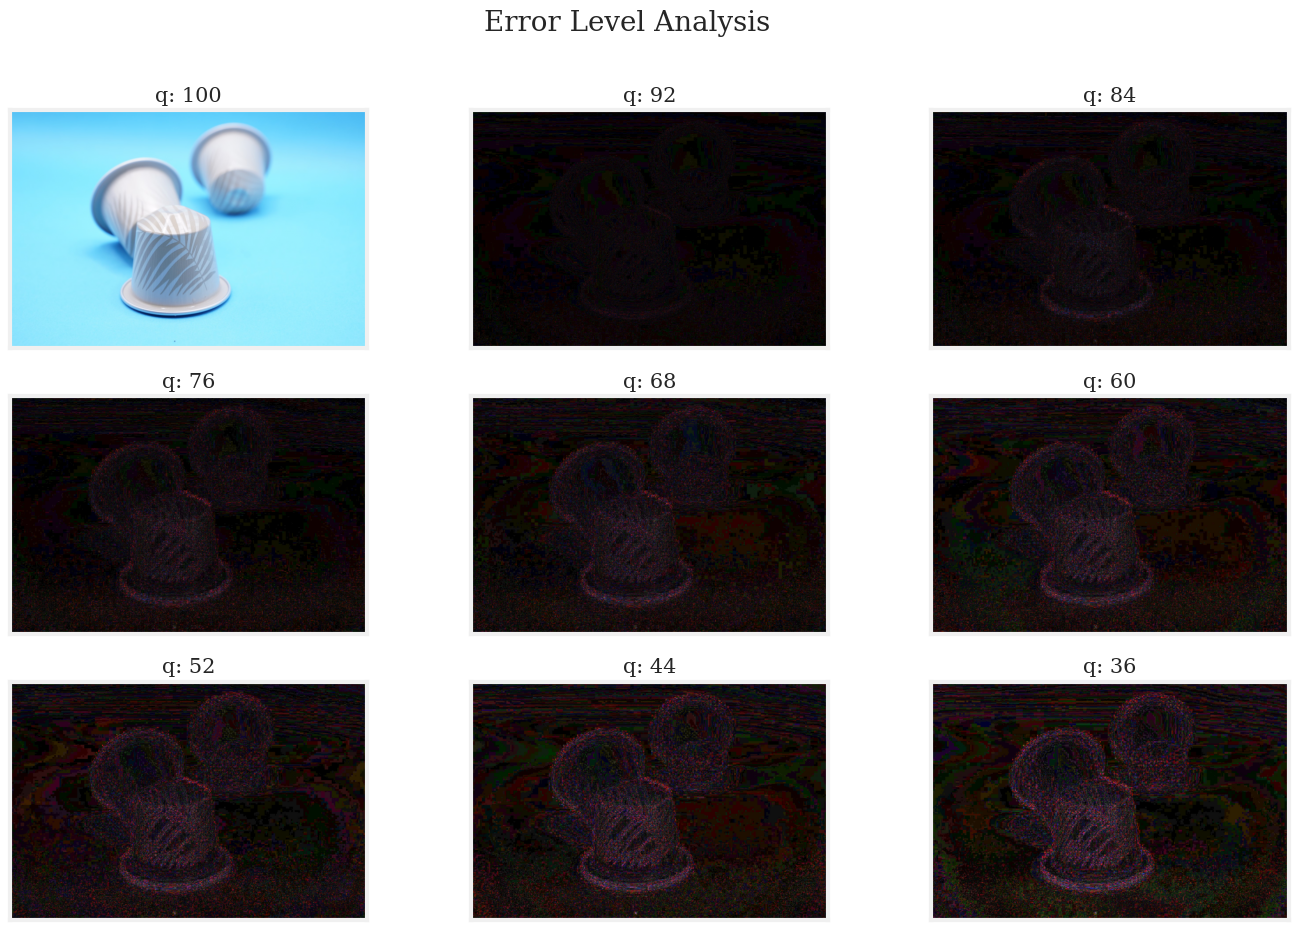

In [7]:
# View random sample from the dataset
p = random_sample('/kaggle/input/nespresso-capsules-dataset/COCONUT_FLAVOUR_OVER_ICE')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Error Level Analysis', fontsize=20)  # Add super title
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
    ax.set_xticks([])  # Remove x-ticks
    ax.set_yticks([])  # Remove y-ticks
plt.show()


<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>📝Data Preprocessing</b></h3>
    <p style="font-size:20px; font-family:verdana; line-height: 1.7em; text-indent: 20px;">The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).</p>
</div>


In [8]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [9]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 544 validated image filenames belonging to 12 classes.
Found 136 validated image filenames belonging to 12 classes.
Found 171 validated image filenames belonging to 12 classes.


In [10]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>🤹Training the model</b></h3>
  <p style="font-size:20px; font-family:verdana; line-height: 1.7em">The model images will be subjected to a pre-trained CNN model called EfficientNetB0. Three callbacks will be utilized to monitor the training. These are: Model Checkpoint, Early Stopping, Tensorboard callback. The summary of the model hyperparameter is shown as follows:</p>

  <p style="font-size:20px">
    <strong>Batch size</strong>: 32<br>
    <strong>Epochs</strong>: 150<br>
    <strong>Input Shape</strong>: (224, 224, 3)<br>
    <strong>Output layer</strong>: 12
  </p>
</div>




In [11]:
# Load the pretained model
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB7(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

258076736/258076736 [==============================] - 8s 0us/step


In [12]:
# Create checkpoint callback
checkpoint_path = "nespresso_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [13]:
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)


outputs = Dense(12, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=150,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "nesspresso_classification"),
        checkpoint_callback,
        reduce_lr
    ]
)

Saving TensorBoard log files to: training_logs/nesspresso_classification/20230718-091423
Epoch 1/150


2023-07-18 09:14:47.716338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


17/17 [==============================] - 53s 1s/step - loss: 3.7022 - accuracy: 0.0919 - val_loss: 2.3846 - val_accuracy: 0.2059 - lr: 1.0000e-04
Epoch 2/150
17/17 [==============================] - 9s 554ms/step - loss: 2.5837 - accuracy: 0.1342 - val_loss: 2.3596 - val_accuracy: 0.2059 - lr: 1.0000e-04
Epoch 3/150
17/17 [==============================] - 9s 545ms/step - loss: 2.4523 - accuracy: 0.1342 - val_loss: 2.3647 - val_accuracy: 0.2059 - lr: 1.0000e-04
Epoch 4/150
17/17 [==============================] - 10s 604ms/step - loss: 2.4051 - accuracy: 0.1526 - val_loss: 2.3353 - val_accuracy: 0.2353 - lr: 1.0000e-04
Epoch 5/150
17/17 [==============================] - 11s 666ms/step - loss: 2.4024 - accuracy: 0.1544 - val_loss: 2.3186 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 6/150
17/17 [==============================] - 9s 535ms/step - loss: 2.3300 - accuracy: 0.1930 - val_loss: 2.2800 - val_accuracy: 0.1912 - lr: 1.0000e-04
Epoch 7/150
17/17 [==============================] -

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>✔️Model Evaluation</b></h3>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The test dataset will be used to evaluate the performance of the model.One of the metrics that will be tested would be accuracy which measures the fraction of predictions the model got right. Other metrics are as follows:   </p>

<h3>Precision(P):</h3> 
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The fraction of true positives (TP, correct predictions) from the total amount of relevant results, i.e., the sum of TP and false positives (FP). For multi-class classification problems, P is averaged among the classes. The following is the formula for precision.</p>

<h4>
  <center>
    <span style="font-size: 1.5em">
      $P = \frac{TP}{TP+FP}$
    </span>
  </center>
</h4>


<h3>Recall(R): </h3> 
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The fraction of TP from the total amount of TP and false negatives (FN). For multi-class classification problems, R gets averaged among all the classes. The following is the formula for recall.</p>

<h4>
  <center>
    <span style="font-size: 1.5em">
      $R = \frac{TP}{TP+FN}$
    </span>
  </center>
</h4>


<h3>F1 score(F1): </h3>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The harmonic mean of precision and recall. For multi-class classification problems, F1 gets averaged among all the classes. The following is the formula for F1 score.</p>

<h4>
  <center>
    <span style="font-size: 1.5em">
      $F1 = 2 \times \frac{TP \times FP}{TP + FP}$
    </span>
  </center>
</h4>
</div>

In [14]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.68892
Test Accuracy: 85.38%


# 📉Visualizing loss curves

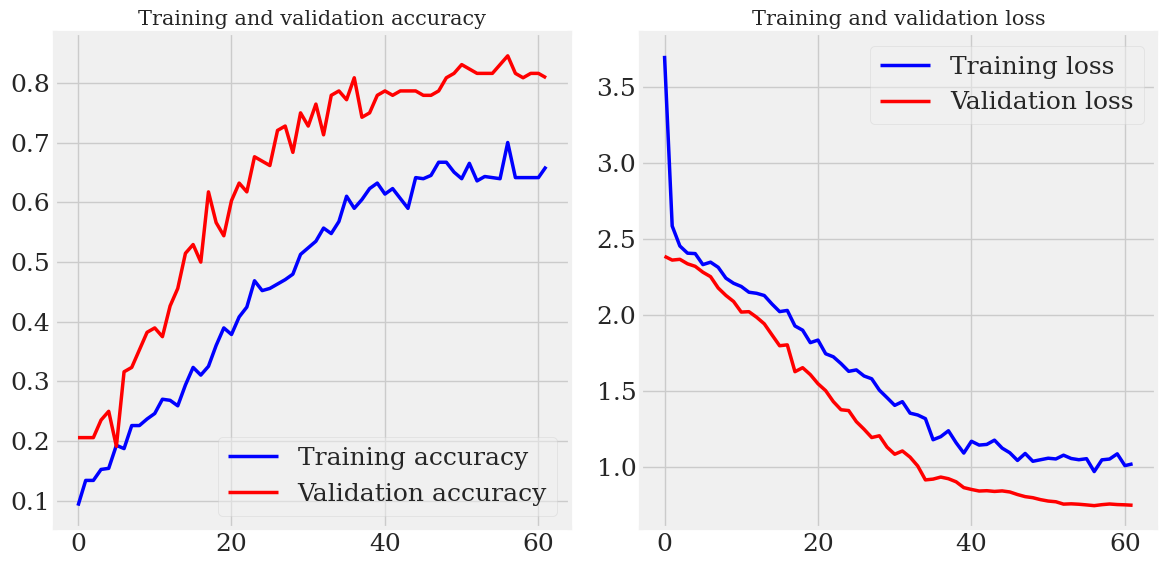

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of plots

# Plot accuracy
ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

# Plot loss
ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()


# 🔮Making predictions on the Test Data

In [16]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

6/6 [==============================] - 9s 340ms/step
The first 5 predictions: ['PARIS_ESPRESSO', 'COLOMBIA', 'ISTANBUL_ESPRESSO', 'RIO_DE_JANEIRO_ESPRESSO', 'COCONUT_FLAVOUR_OVER_ICE']


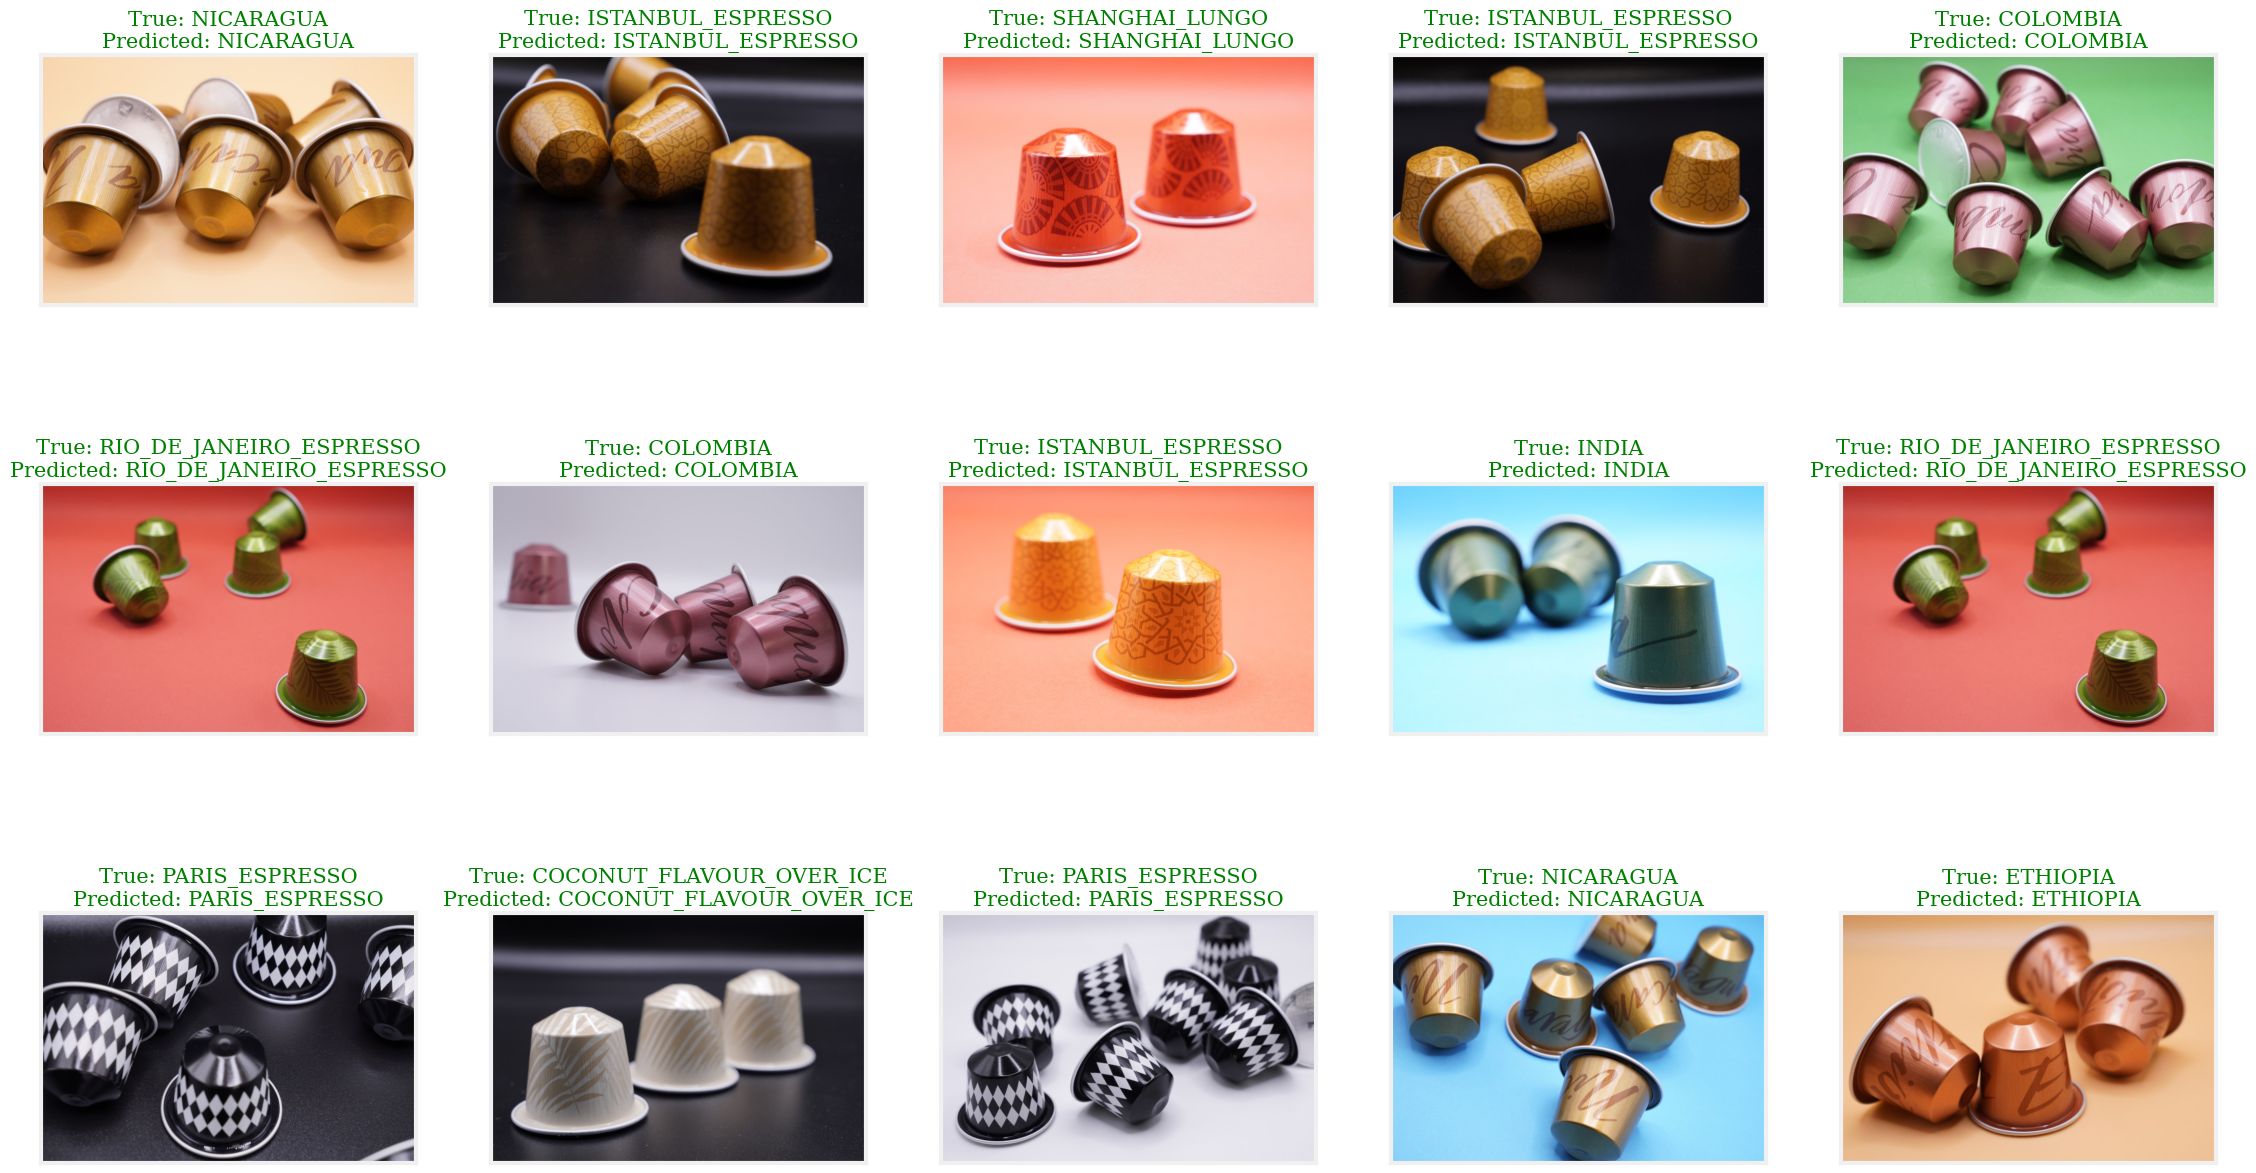

<Figure size 640x480 with 0 Axes>

In [17]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>📊Plotting the Classification Reports and Confusion Matrix</b></h3>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em"><b>Confusion matrix</b> and <b>classification report</b> are two important tools used for evaluating the performance of an image classification model.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">A <b>confusion matrix</b> is a table that summarizes the number of correct and incorrect predictions made by a classification model on a set of test data. It is usually represented as a square matrix with rows and columns representing the predicted and true class labels, respectively. The entries of the matrix indicate the number of test samples that belong to a certain class, and how many of those were classified correctly or incorrectly by the model. A confusion matrix can provide a detailed breakdown of the performance of the model, including measures such as accuracy, precision, recall, and F1-score for each class. It can be used to identify specific areas where the model is making errors, and to diagnose problems with the model's predictions.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">A <b>classification report</b> is a summary of the key performance metrics for a classification model, including precision, recall, and F1-score, as well as the overall accuracy of the model. It provides a concise overview of the model's performance, typically broken down by class, and can be used to quickly assess the strengths and weaknesses of the model. The report is often presented as a table, with each row representing a class and columns showing various performance metrics. The report may also include other metrics such as support (the number of test samples belonging to a particular class), and the macro- and micro-averages of the performance metrics across all classes.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">In image classification, both confusion matrix and classification report are important tools for evaluating the performance of the model, identifying areas for improvement, and making decisions about how to adjust the model's architecture or training parameters.</p>
</div>

In [18]:
y_test = list(test_df.Label)
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
COCONUT_FLAVOUR_OVER_ICE   1.000000  1.000000  1.000000   13.000000
COLOMBIA                   0.882353  0.789474  0.833333   19.000000
ETHIOPIA                   0.846154  0.785714  0.814815   14.000000
INDIA                      0.833333  0.833333  0.833333   18.000000
INDONESIA                  0.571429  0.727273  0.640000   11.000000
ISTANBUL_ESPRESSO          0.904762  0.950000  0.926829   20.000000
NAPOLI                     0.769231  1.000000  0.869565   10.000000
NICARAGUA                  0.666667  0.727273  0.695652   11.000000
NOCCIOLA                   1.000000  0.818182  0.900000   11.000000
PARIS_ESPRESSO             0.944444  0.944444  0.944444   18.000000
RIO_DE_JANEIRO_ESPRESSO    1.000000  0.923077  0.960000   13.000000
SHANGHAI_LUNGO             0.818182  0.692308  0.750000   13.000000
accuracy                   0.853801  0.853801  0.853801    0.853801
macro avg                  0.853046  0.849256  0.847331  171.000000
weighted avg               0.863473  0.853801  0.855527  171.000000

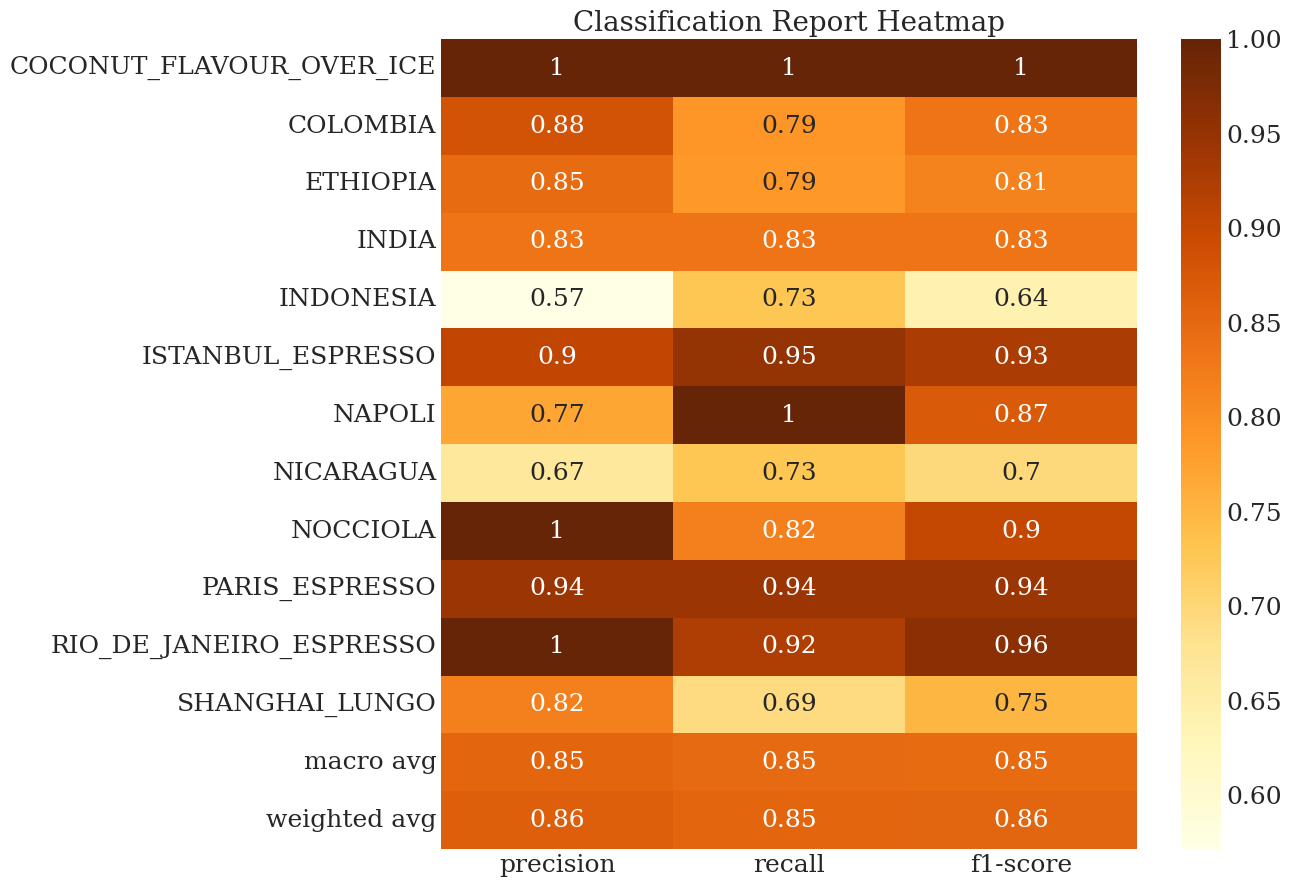

In [19]:
# Remove the 'accuracy' row
df = df.drop(['accuracy'])

# Remove the 'support' column
df = df.drop(['support'], axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap='YlOrBr')
plt.title('Classification Report Heatmap', fontsize=20)
plt.show()


In [20]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 14), text_size=10, norm=False, savefig=False): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.YlOrBr) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")


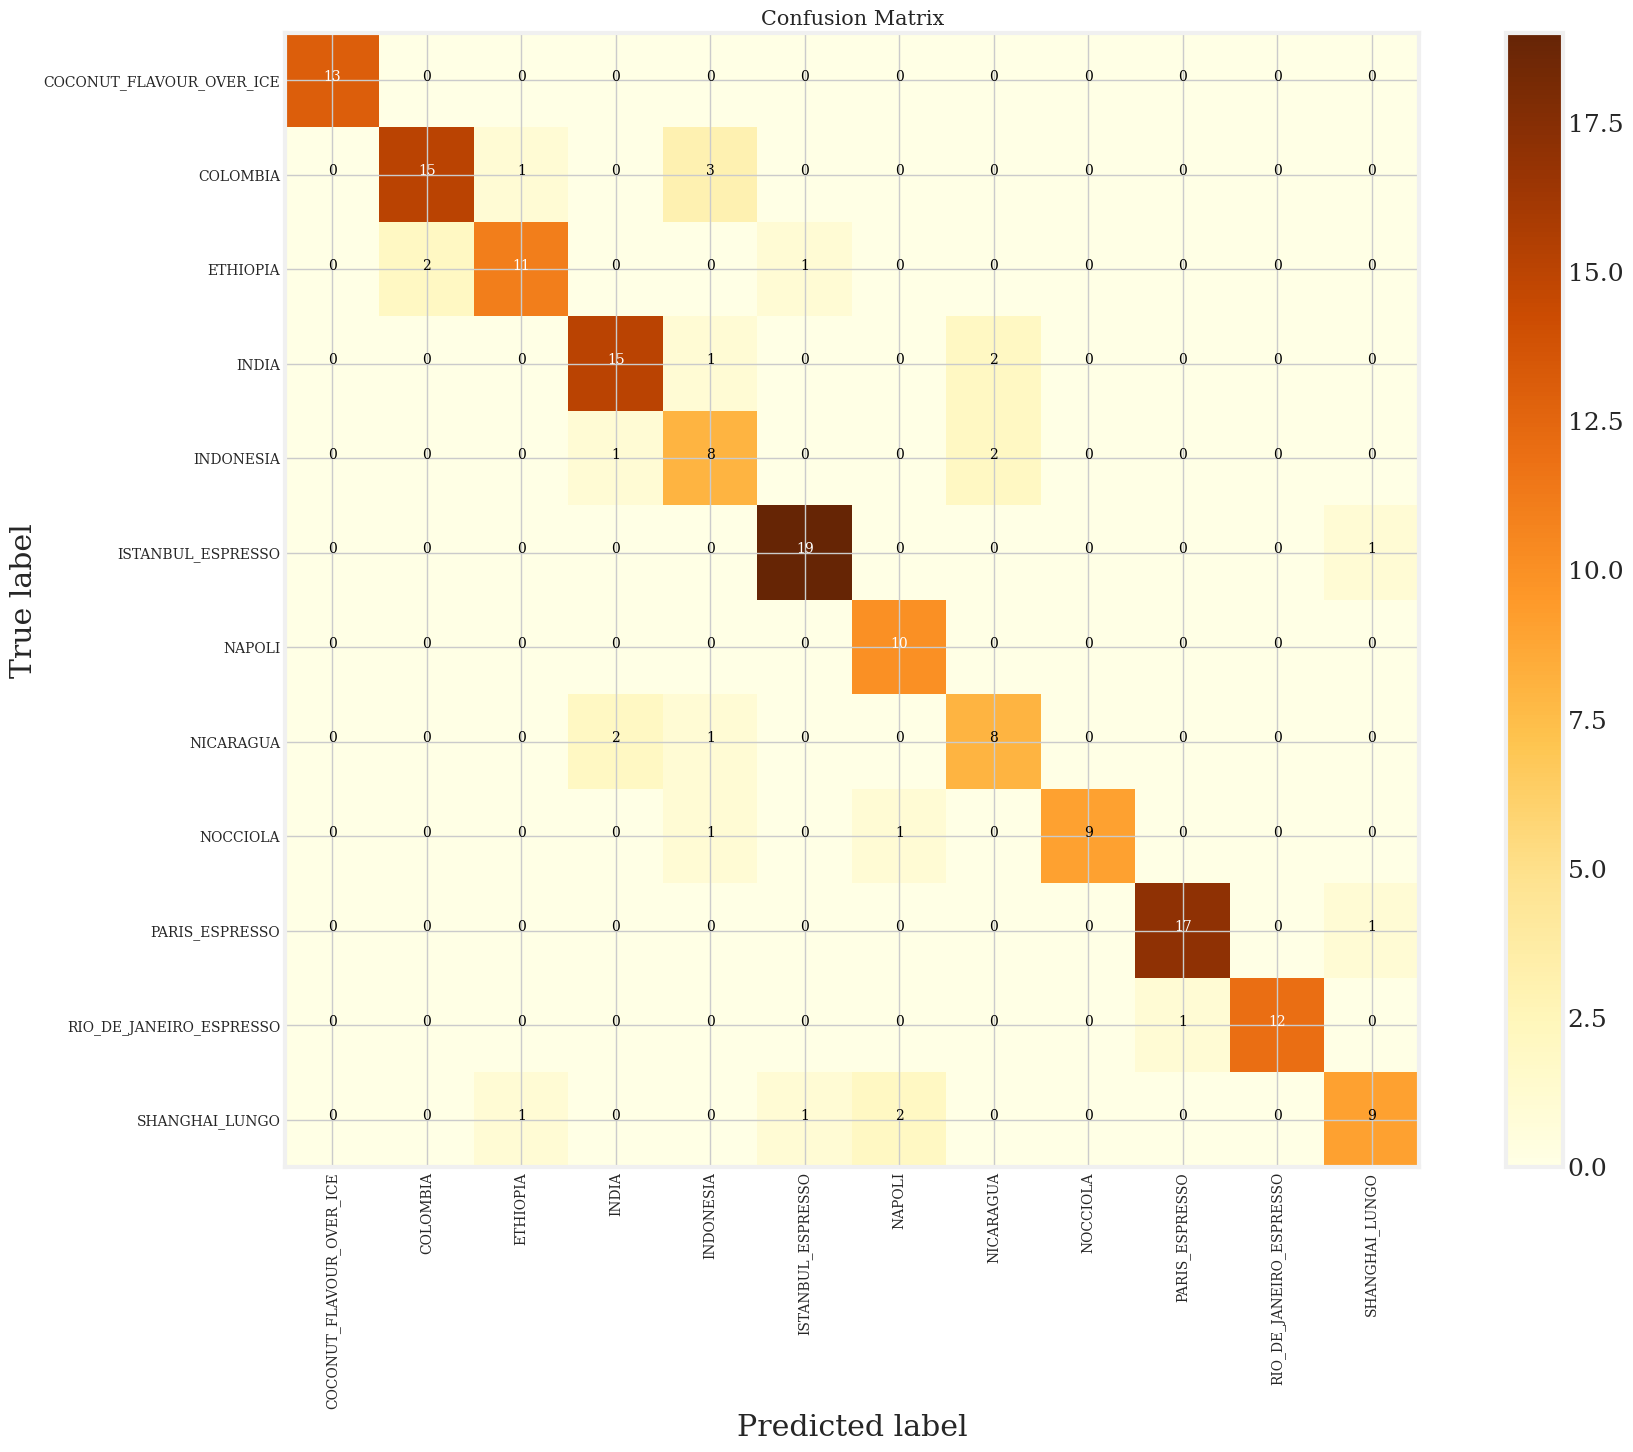

In [21]:
make_confusion_matrix(y_test, pred, list(labels.values()))

<div style="background-color:#fff1cc; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:verdana; color:#6F4E37;"><b>☀️Grad-Cam Visualization</b></h3>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em"><b>Grad-CAM (Gradient-weighted Class Activation Mapping)</b> is a technique used to visualize the regions of an input image that were most relevant for a neural network's prediction. It allows you to see which regions of the image the model focused on while making its prediction. Grad-CAM is a modification of the CAM technique that extends the latter to any model that uses a convolutional neural network (CNN) as its underlying architecture.</p>
</div>

In [22]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
decode_predictions = tf.keras.applications.efficientnet.decode_predictions
    
last_conv_layer_name = "top_conv"
img_size = (224,224, 3)

# Remove last layer's softmax
model.layers[-1].activation = None

/tmp/ipykernel_23/1532212147.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


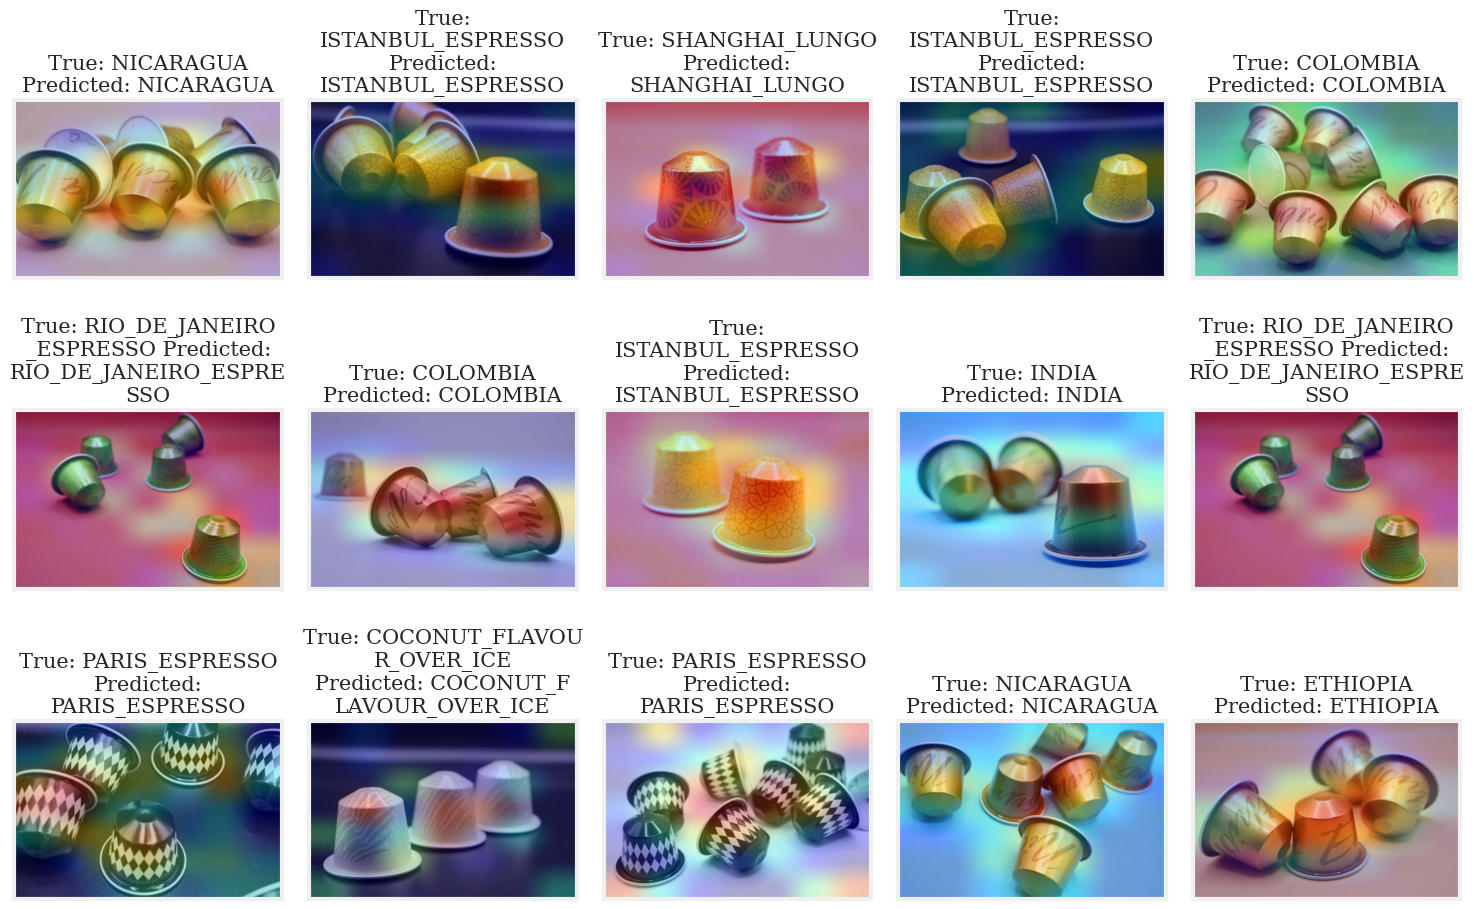

In [23]:
import textwrap

# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    
    # Wrap the title text
    title_text = f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}"
    wrapped_title = '\n'.join(textwrap.wrap(title_text, 20))  # Adjust the number as needed
    ax.set_title(wrapped_title)
    
plt.tight_layout()
plt.show()


***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Thanks for viewing my work. If you like it, consider sharing it to others or give feedback to improve the notebook. Have a beautiful day my friend.
        </p>
    </div>

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s' 
     height=30px width=160px /></center>